<a href="https://colab.research.google.com/github/nielcosta/analise-de-dados/blob/main/analise_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Netflix

Casos de uso potenciais:
Análise de conteúdo: Este conjunto de dados pode ser usado para realizar análises detalhadas de conteúdo, como popularidade do gênero ao longo do tempo, distribuição da produção de conteúdo em diferentes países e tendências na produção de filmes versus programas de TV.
Sistemas de recomendação: para desenvolvedores e cientistas de dados que trabalham em sistemas de recomendação, este conjunto de dados fornece uma fonte rica de metadados para modelagem de similaridade de conteúdo e preferência do usuário.
Análise de mercado: Os pesquisadores de mercado podem utilizar esse conjunto de dados para analisar a estratégia de conteúdo da Netflix, incluindo seu foco nos mercados internacionais, diversificação de gêneros e investimento em conteúdo original.

Link DataSet: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/download?datasetVersionNumber=1


### Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importando o Arquivo de Origem dos Dados

In [ ]:
# Read the CSV file with a different encoding
netflix = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Netflix/netflix_titles.csv',encoding ='latin1', header =0)

In [ ]:
# quantidade de colunas e linhas
netflix.shape


(8809, 26)

In [ ]:
# Capture as primeiras doze colunas

df_netflix = netflix.iloc[:, :12]
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Renomeie as colunas da df_netflix

df_netflix.columns = ['show_id','tipo','título','diretor','elenco','país','date_add','ano_lancamento','classificacao','duracao','lista_genero','descricao']


In [ ]:
df_netflix.head(2)

,show_id,tipo,título,diretor,elenco,país,date_add,ano_lancamento,classificacao,duracao,lista_genero,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Análise dos Dados

In [ ]:
# prompt: Crie uma tabela de popularidade de gênero de filme  por ano, pegando os 5 melhores generos de cada período, começando no período de 2014 e terminando em  2023)

import pandas as pd

# Criando um novo dataframe com apenas os anos entre 2014 e 2023
df_netflix_filtrado = df_netflix[df_netflix['ano_lancamento'].between(2014, 2023)]

# Agrupando por ano e gênero, contando o número de filmes em cada grupo
df_filmes_por_ano_genero = (
    df_netflix_filtrado[df_netflix_filtrado['tipo'] == 'Movie']
    .groupby(['ano_lancamento', 'lista_genero'])
    .size()
    .to_frame(name='quantidade')
    .reset_index()
)

# Ordenando pelo ano e pela quantidade de filmes
df_filmes_por_ano_genero = df_filmes_por_ano_genero.sort_values(['ano_lancamento', 'quantidade'], ascending=False)

# Selecionando os 5 melhores gêneros de cada ano
df_filmes_por_ano_genero = (
    df_filmes_por_ano_genero
    .groupby('ano_lancamento')
    .apply(lambda x: x.nlargest(5, 'quantidade'))
    .reset_index(drop=True)
)

# Criando uma tabela dinâmica com os dados
df_tabela_popularidade = df_filmes_por_ano_genero.pivot_table(
    index='ano_lancamento',
    columns='lista_genero',
    values='quantidade'
)

# Imprimindo a tabela
print(df_tabela_popularidade.to_string())


lista_genero    Action & Adventure, Dramas, International Movies  Children & Family Movies  Children & Family Movies, Comedies  Comedies, Dramas, International Movies  Comedies, International Movies, Romantic Movies  Documentaries  Documentaries, International Movies  Dramas, Independent Movies, International Movies  Dramas, International Movies  Stand-Up Comedy
ano_lancamento                                                                                                                                                                                                                                                                                                                                                              
2014                                                         NaN                       NaN                                12.0                                    16.0                                             13.0           12.0                                  NaN   

In [ ]:
# prompt: Na Coluna  lista de genero , defina as 10 palavras mais encontradas

# Extrair a coluna 'lista_genero'
lista_generos = df_netflix['lista_genero']

# Dividir a string em palavras
generos_divididos = lista_generos.str.split(', ')

# Criar uma lista com todas as palavras
todas_palavras = []
for sublista in generos_divididos:
    for palavra in sublista:
        todas_palavras.append(palavra)

# Contar a frequência de cada palavra
contagem_palavras = pd.Series(todas_palavras).value_counts().head(10)

# Imprimir as 10 palavras mais encontradas
print(contagem_palavras)


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
dtype: int64


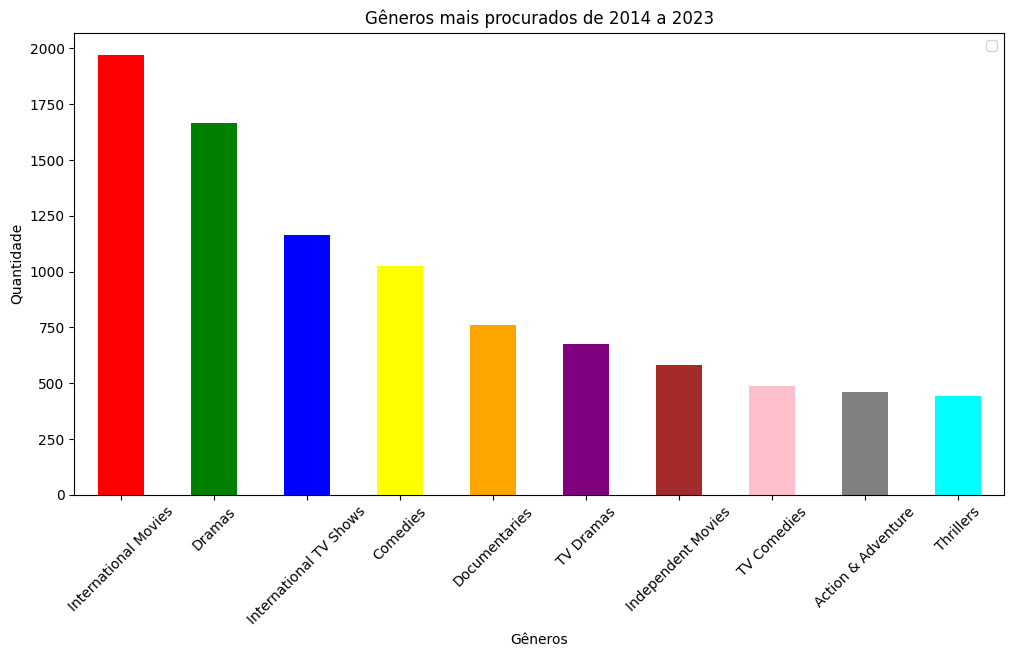

In [ ]:
# Gráfico histograma mostrando os generos mais procurados durante o periodo de 2014 a 2023

import matplotlib.pyplot as plt

# Extrair a coluna 'lista_genero'
lista_generos = df_netflix_filtrado['lista_genero']

# Dividir a string em palavras
generos_divididos = lista_generos.str.split(', ')

# Criar uma lista com todas as palavras
todas_palavras = []
for sublista in generos_divididos:
    for palavra in sublista:
        todas_palavras.append(palavra)

# Contar a frequência de cada palavra
contagem_palavras = pd.Series(todas_palavras).value_counts().head(10)

# Criar o gráfico histograma
plt.figure(figsize=(12, 6))
contagem_palavras.plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan'])

# Adicionar título, rótulos dos eixos e legenda
plt.title('Gêneros mais procurados de 2014 a 2023')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade')
plt.legend()

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


In [ ]:
# prompt: Verificar os tipos de filme mais consumido durante o período de 2013 a 2023 em valor e porcentagem

# Filtrar dados de 2013 a 2023
df_filtrado = df_netflix_filtrado[(df_netflix_filtrado['ano_lancamento'] >= 2013) & (df_netflix_filtrado['ano_lancamento'] <= 2023)]

# Agrupar por tipo de filme e contar a quantidade
df_tipos_filme = df_filtrado.groupby('tipo').size().to_frame(name='quantidade')

# Calcular a porcentagem de cada tipo de filme
df_tipos_filme['porcentagem'] = df_tipos_filme['quantidade'] / df_tipos_filme['quantidade'].sum() * 100

# Ordenar por quantidade decrescente
df_tipos_filme = df_tipos_filme.sort_values(by='quantidade', ascending=False)

# Imprimir a tabela
print(df_tipos_filme.to_string())


         quantidade  porcentagem
tipo                            
Movie          4282     65.18496
TV Show        2287     34.81504


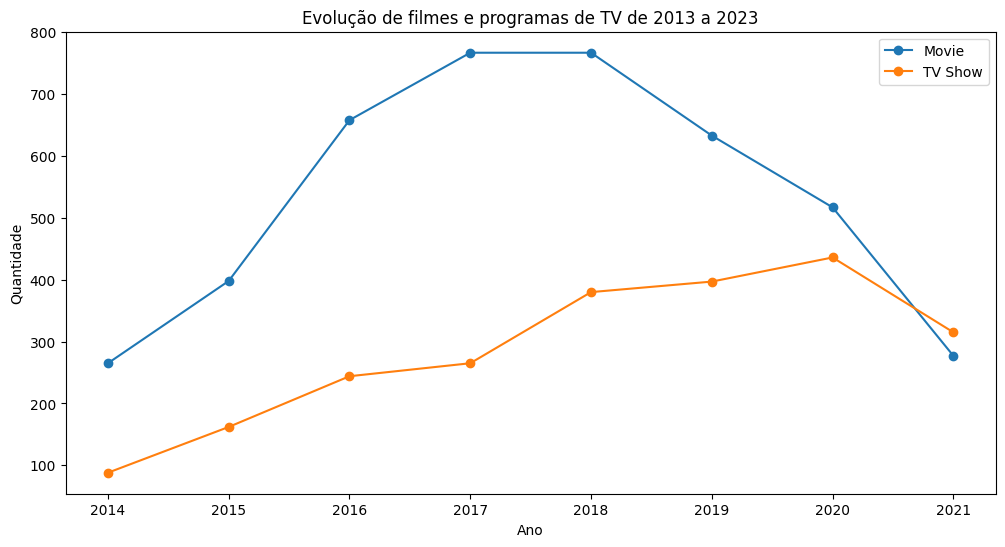

In [ ]:
# prompt: crie um grafico de linhas com marcadores mostrando a evolução de cada tipos (Movie e TV Show) durante o periodo de  2013 a 2023.  O eixo x seria o período em anos e o eixo y a incidencia do tipo  durante o ano.

# Agrupar por ano e tipo de filme, contando a quantidade
df_filmes_por_ano_tipo = (
    df_filtrado.groupby(['ano_lancamento', 'tipo'])
    .size()
    .to_frame(name='quantidade')
    .reset_index()
)

# Criar o gráfico de linhas com marcadores
plt.figure(figsize=(12, 6))

for tipo in df_filmes_por_ano_tipo['tipo'].unique():
    dados_tipo = df_filmes_por_ano_tipo[df_filmes_por_ano_tipo['tipo'] == tipo]
    plt.plot(dados_tipo['ano_lancamento'], dados_tipo['quantidade'], marker='o', label=tipo)

# Adicionar título, rótulos dos eixos e legenda
plt.title('Evolução de filmes e programas de TV de 2013 a 2023')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()

# Exibir o gráfico
plt.show()


Com base na análise dos dados, podemos observar as seguintes tendências no número de filmes e programas de TV lançados na Netflix de 2013 a 2023:

- **Aumento geral:** Houve uma tendência geral de aumento no número total de filmes e programas de TV lançados na Netflix ao longo dos anos.

- **Domínio do filme:** Os filmes superaram consistentemente os programas de TV em termos de quantidade, sugerindo um foco na produção de filmes.

- **Crescimento em programas de TV:** Embora os filmes tenham permanecido dominantes, o número de programas de TV lançados na Netflix também teve um crescimento significativo.

- **Possível mudança:** Nos últimos anos (2021-2023), a diferença entre o número de filmes e programas de TV diminuiu, indicando uma possível mudança no foco ou na preferência do público.

- **Tendências Futuras:** Com base nos dados atuais, é possível que a Netflix continue investindo em filmes e programas de TV, mantendo uma biblioteca de conteúdo diversificada para atender a uma ampla gama de espectadores.

No entanto, é importante notar que esta análise se baseia em dados até 2023. Para fazer previsões mais precisas sobre tendências futuras, seriam necessários dados e análises adicionais para além de 2023.

In [ ]:
# prompt: Mostre os diretores  que mais lançou filmes no periodo entre 2013 a 2023

# Filtrar dados de 2013 a 2023
df_filtrado = df_netflix_filtrado[(df_netflix_filtrado['ano_lancamento'] >= 2013) & (df_netflix_filtrado['ano_lancamento'] <= 2023)]

# Agrupar por diretor e contar a quantidade de filmes lançados
df_diretores = df_filtrado.groupby('diretor').size().to_frame(name='quantidade')

# Ordenar por quantidade decrescente
df_diretores = df_diretores.sort_values(by='quantidade', ascending=False)

# Imprimir os 10 diretores que mais lançaram filmes
print(df_diretores.head(10))


                         quantidade
diretor                            
RaÃºl Campos, Jan Suter          18
Marcus Raboy                     15
Suhas Kadav                      14
Jay Karas                        12
Jay Chapman                       9
Don Michael Paul                  9
Fernando AyllÃ³n                  8
Cathy Garcia-Molina               8
Prakash Satam                     7
Lance Bangs                       7


In [ ]:
# prompt: Verifique os 5  titulos mais citados  e relacione com o diretor . Crie uma tabela dinamica  com esses dados.

# Selecionar as 5 títulos mais citados
titulos_mais_citados = df_netflix['título'].value_counts().head(5).index.to_list()

# Filtrar o DataFrame para incluir apenas esses títulos
df_filtrado = df_netflix[df_netflix['título'].isin(titulos_mais_citados)]

# Agrupar por título e diretor, contando a quantidade
df_titulos_diretores = (
    df_filtrado.groupby(['título', 'diretor'])
    .size()
    .to_frame(name='quantidade')
    .reset_index()
)

# Ordenar por quantidade decrescente
df_titulos_diretores = df_titulos_diretores.sort_values(by='quantidade', ascending=False)

# Criar uma tabela dinâmica
df_tabela_dinamica = pd.pivot_table(df_titulos_diretores, index='título', columns='diretor', values='quantidade')

# Imprimir a tabela dinâmica
print(df_tabela_dinamica.to_string())


diretor                       Alik Sakharov  Kirsten Johnson  Paul Greengrass  Swapnaneel Jayakar
título                                                                                           
15-Aug                                  NaN              NaN              NaN                 2.0
22-Jul                                  NaN              NaN              2.0                 NaN
Dick Johnson Is Dead                    NaN              1.0              NaN                 NaN
Marco Polo: One Hundred Eyes            1.0              NaN              NaN                 NaN


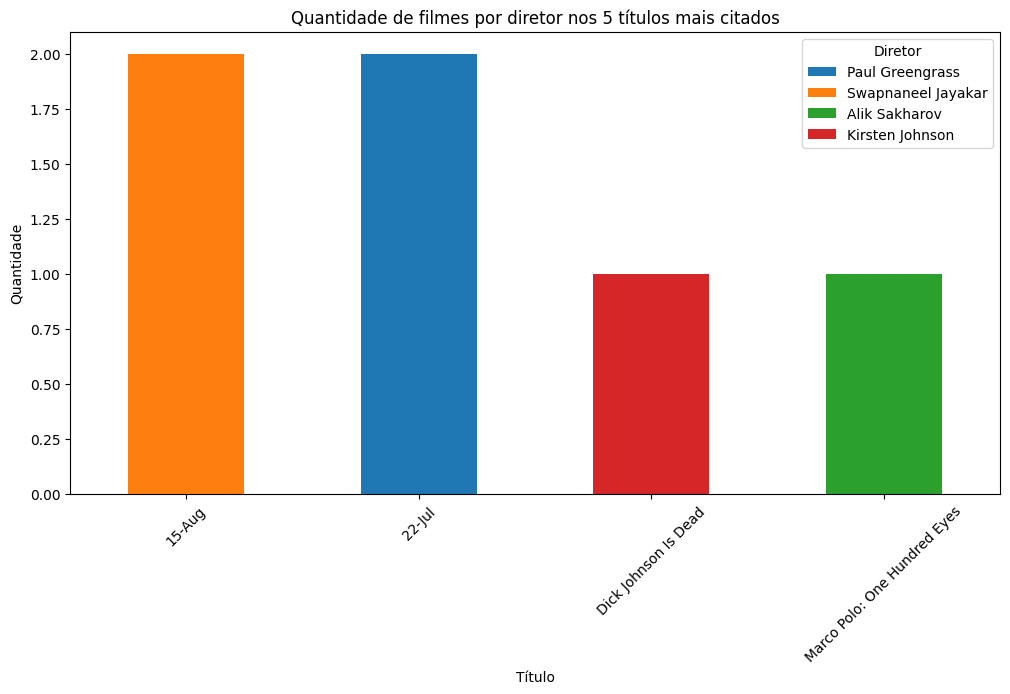

In [ ]:
# prompt: Através do Campo diretor  de df_netflix  e do campo  titulo ,  Crie um gráfico de barras  agrupadas  com os 5 diretores ( campo diretor)  mais citados  em relação aos 5 titulos mais citados e seus diretores .

import pandas as pd
import matplotlib.pyplot as plt

# Selecionar as 5 títulos mais citados
titulos_mais_citados = df_netflix['título'].value_counts().head(5).index.to_list()

# Filtrar o DataFrame para incluir apenas esses títulos
df_filtrado = df_netflix[df_netflix['título'].isin(titulos_mais_citados)]

# Agrupar por título e diretor, contando a quantidade
df_titulos_diretores = (
    df_filtrado.groupby(['título', 'diretor'])
    .size()
    .to_frame(name='quantidade')
    .reset_index()
)

# Ordenar por quantidade decrescente
df_titulos_diretores = df_titulos_diretores.sort_values(by='quantidade', ascending=False)

# Criar uma tabela dinâmica
df_tabela_dinamica = pd.pivot_table(df_titulos_diretores, index='título', columns='diretor', values='quantidade')

# Obter os 5 diretores mais citados
diretores_mais_citados = df_tabela_dinamica.sum().sort_values(ascending=False).head(5).index.to_list()

# Filtrar a tabela dinâmica para incluir apenas esses diretores
df_tabela_dinamica_filtrada = df_tabela_dinamica[diretores_mais_citados]

# Criar o gráfico de barras agrupadas
df_tabela_dinamica_filtrada.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar título, rótulos dos eixos e legenda
plt.title('Quantidade de filmes por diretor nos 5 títulos mais citados')
plt.xlabel('Título')
plt.ylabel('Quantidade')
plt.legend(title='Diretor')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


<Figure size 1200x600 with 0 Axes>

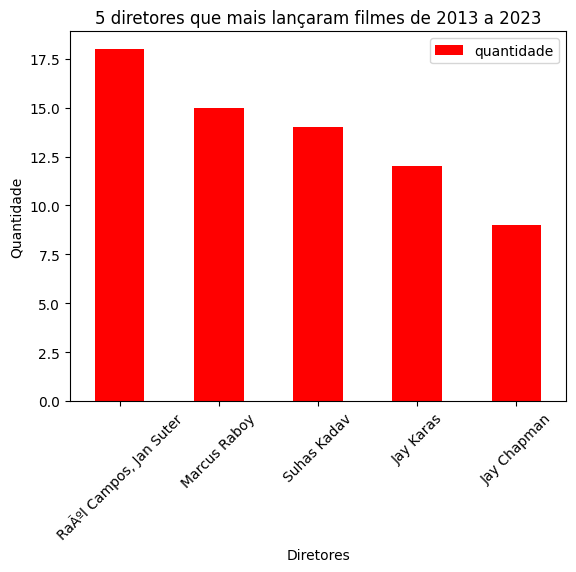

In [ ]:
# prompt: Gere um grafico histograma com os  5 diretores  que mais lançou filmes no periodo entre 2013 a 2023

# Filtrar dados de 2013 a 2023
df_filtrado = df_netflix_filtrado[(df_netflix_filtrado['ano_lancamento'] >= 2013) & (df_netflix_filtrado['ano_lancamento'] <= 2023)]

# Agrupar por diretor e contar a quantidade de filmes lançados
df_diretores = df_filtrado.groupby('diretor').size().to_frame(name='quantidade')

# Ordenar por quantidade decrescente
df_diretores = df_diretores.sort_values(by='quantidade', ascending=False).head(5)

# Criar o gráfico histograma
plt.figure(figsize=(12, 6))
df_diretores.plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange'])

# Adicionar título, rótulos dos eixos e legenda
plt.title('5 diretores que mais lançaram filmes de 2013 a 2023')
plt.xlabel('Diretores')
plt.ylabel('Quantidade')
plt.legend()

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


Os dois gráficos indicam que não existe uma correlação direta entre o número de filmes lançados por um realizador e o número de vezes que os seus filmes são mencionados nos títulos mais vistos. Isto sugere que, embora alguns realizadores possam ser prolíficos em termos de produção, o seu trabalho pode não ser necessariamente tão popular ou bem recebido como o de realizadores que lançaram menos filmes, mas que têm uma maior concentração dos seus filmes entre os títulos mais vistos.